# Customer Transaction Segmentation in Retail Banking

## Goal: Analyze customer transaction patterns and segment user profiles based on spending habits, to identify insights useful for retention strategies in retail banking.

🔍 **What’s included:** 
- Simulated dataset of 1,000 customers and 5,000 transactions
- Exploratory analysis by category and frequency
- Clustering by behavior (KMeans)
- Key KPIs: avg. spend, retention proxy, active days

## 1.- Exploratory Data Analysis: 
In this chapter, I will explore the simulated datasets in order to get useful insights. In this first approach, I will:
- Explore the distribution of the clients by age and incomes
- Find out the most common transactions categories
- Total and average transactions by region or account type


First, let's import our data: 

In [151]:
import pandas as pd 

customers_df = pd.read_csv('C:/Users/aleja/OneDrive/Desktop/Workspaces/portfolio/simulated_bank/data/Customers__Updated_.csv')
transactions_df = pd.read_csv('C:/Users/aleja/OneDrive/Desktop/Workspaces/portfolio/simulated_bank/data/Transactions__Updated_.csv')

transactions_df.head()

#I see that in transactions' df there is a uselesss column so I drop it:
clean_transactions = transactions_df.drop(['Unnamed: 0'],axis=1)
clean_transactions

,transaction_id,customer_id,amount,category,date
0,1,1246,118.64,Travel,2025-06-10
1,2,1405,124.90,Travel,2024-10-13
2,3,1844,145.23,Travel,2025-02-15
3,4,1759,138.98,Dining,2025-06-05
4,5,1541,187.40,Groceries,2024-07-17
...,...,...,...,...,...
9995,9996,1444,112.52,Travel,2024-09-07
9996,9997,1999,98.62,Dining,2025-06-26
9997,9998,1427,143.83,Healthcare,2024-11-14
9998,9999,1057,139.58,Groceries,2024-07-01


### 1.1.- Customer Distribution by Age

First, let's see the statistics of this column:


In [98]:
customers_df.age.describe()
#customers_df.age.quantile(.75)

count    1000.000000
mean       44.904000
std        14.178639
min        18.000000
25%        35.000000
50%        45.000000
75%        54.000000
max        80.000000
Name: age, dtype: float64

We see that all customers are between 18 and 69 years old. In order to get better visualizations, I will categorize the age in 4 groups. In this case, I will take profit of the quartiles:

In [336]:
min_age = 18
q1 = customers_df.age.quantile(.25)
q2 = customers_df.age.quantile(.5)
q3 = customers_df.age.quantile(.75)
max_age = 69

age_bins = [min_age,q1,q2,q3,max_age]

customers_df['age_category'] = pd.cut(customers_df['age'], bins=age_bins,labels=['young','adult','senior','old'], include_lowest=True)

customers_df['age_category']

0      senior
1       adult
2      senior
3         old
4       adult
        ...  
995     adult
996       NaN
997    senior
998     adult
999    senior
Name: age_category, Length: 1000, dtype: category
Categories (4, object): ['young' < 'adult' < 'senior' < 'old']

Now, let's build the visualization: 

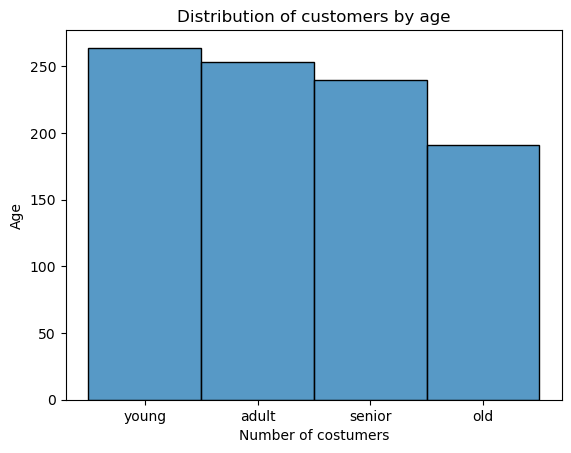

In [100]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.histplot(data=customers_df,x='age_category')
plt.ylabel('Age')
plt.xlabel('Number of costumers')
plt.title('Distribution of customers by age')
plt.show()


The histogram tells us that the amount of customers slightly decreases when the customers are older. However, the amount in the young, adult and senior groups is still quite similar. Let's visualize it in a piechart to double check: 

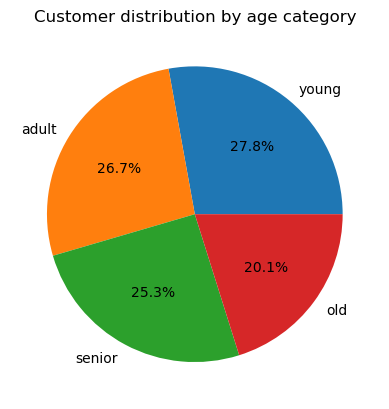

In [337]:
age_counts = customers_df['age_category'].value_counts()

# now plotting 
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Customer distribution by age category')
plt.show()

### 1.2.- Most Frequent Spending Category
In this second chapter, I will address the most common transaction in our second DataFrame

In [317]:
clean_transactions.category.mode()

0    Groceries
Name: category, dtype: object

Utilities category is the most common transaction category in our df.

### 1.3.- Total and Average Spending by Region and Account Type
To do this, I first need to merge both DataFrames, as I need information from both df:

In [153]:
merged_df = pd.merge(customers_df,clean_transactions)
merged_df.head()

,customer_id,age,income,region,account_type,transaction_id,amount,category,date
0,1001,52,114983,Basel,Premium,129,162.16,Groceries,2025-06-30
1,1001,52,114983,Basel,Premium,371,94.06,Dining,2024-08-02
2,1001,52,114983,Basel,Premium,633,56.48,Dining,2024-05-29
3,1001,52,114983,Basel,Premium,707,96.55,Dining,2024-04-23
4,1001,52,114983,Basel,Premium,1053,184.26,Utilities,2025-01-08


Now that we have our merged df, we can group it by region and by account type to then get the total and the average:

In [154]:
#grouping by region and account type:
grouped_region = merged_df.groupby('region')
grouped_atype = merged_df.groupby('account_type')




In [155]:
#now, getting the total by region:

grouped_region['amount'].sum()

region
Basel       220148.41
Bern        211462.67
Geneva      205359.93
Lausanne    209693.75
Zurich      234549.27
Name: amount, dtype: float64

In [156]:
#and the average by region:
grouped_region['amount'].mean()

region
Basel       108.394097
Bern        108.945219
Geneva      106.625093
Lausanne    107.922671
Zurich      108.637920
Name: amount, dtype: float64

In [157]:
#doing exactly the same with the account type:

grouped_atype['amount'].sum()

account_type
Basic      545229.40
Gold       203493.23
Premium    332491.40
Name: amount, dtype: float64

In [158]:
#and getting the average:

grouped_atype['amount'].mean()

account_type
Basic      108.936943
Gold       106.485207
Premium    107.811738
Name: amount, dtype: float64

I think those numbers don't say so much about the distribution, so better build a couple of fast visualizations: 


In [159]:
#targetting our data
atype_counts = grouped_atype['amount'].sum()
region_counts = grouped_region['amount'].sum()


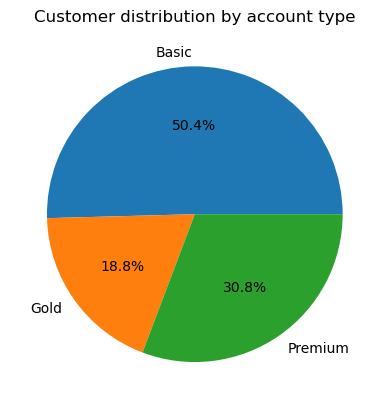

In [160]:
plt.pie(atype_counts, labels=atype_counts.index, autopct='%1.1f%%')
plt.title('Customer distribution by account type')
plt.show()

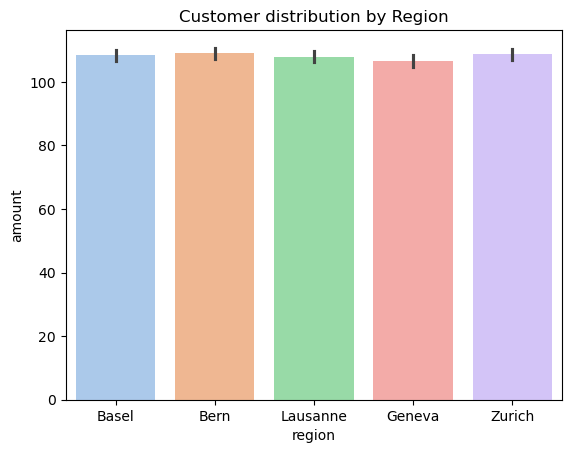

In [161]:
sns.barplot(data=merged_df, x='region',y='amount',hue='region', palette='pastel')
plt.title('Customer distribution by Region')
plt.show()

We find a perfectly homogeneus distribution between regions, having the exactly amount of customers in every region. In the other hand, there is a big gap between the amount of customers for each account type: half of the total customers have bought the basic account. The 50% left is distributed mainly in the gold account (18.8%) and the (30.8%). This means that the average customer prefers to spend less and have a more basic service.

## 2. - Clustering by behavior (Financial KPIs)
In this chapter, we will study the KMeans of this datasets. To achieve that, I will first focus on the average outcomes by client, then on the transactions frecuency by account type and finally on the months with most outcome volume.

### 2.1.- Average Spending per Customer

In [163]:
clean_transactions

,transaction_id,customer_id,amount,category,date
0,1,1246,118.64,Travel,2025-06-10
1,2,1405,124.90,Travel,2024-10-13
2,3,1844,145.23,Travel,2025-02-15
3,4,1759,138.98,Dining,2025-06-05
4,5,1541,187.40,Groceries,2024-07-17
...,...,...,...,...,...
9995,9996,1444,112.52,Travel,2024-09-07
9996,9997,1999,98.62,Dining,2025-06-26
9997,9998,1427,143.83,Healthcare,2024-11-14
9998,9999,1057,139.58,Groceries,2024-07-01


In [176]:
#first we obtain the total outcome for all clients
total_trans_client = clean_transactions.groupby('customer_id')['amount'].sum()

#then the mean, which gives us the mean of all transactions:
average_by_client = total_trans_client.mean()
average_by_client

np.float64(1081.21403)

In [168]:
#the mean itself doesn't give so much information, as we have different profiles of customers. Let's go for the descriptive statistics:
total_trans_client.describe()

count    1000.00000
mean     1081.21403
std       382.25840
min       175.42000
25%       806.70000
50%      1036.55000
75%      1329.43250
max      2836.53000
Name: amount, dtype: float64

In this case, we have a mean that is not so far from the median, which means that the average will be quite a representative number for the general outcomes. However, there is a big gap between the third quartile and the maximum, which clearly indicates that even if there are less transactions of this amount, they are actually quite bigger. Let's try to see the distribution of the transactions by client with a histogram and a boxplot to individuate the outliers:

<Axes: xlabel='amount', ylabel='Count'>

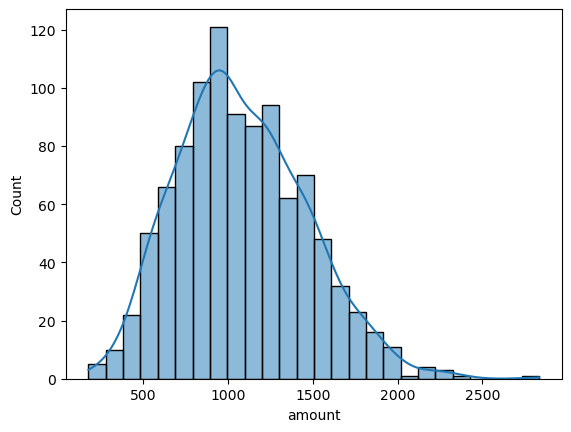

In [170]:
sns.histplot(total_trans_client,kde=True)

<Axes: xlabel='amount'>

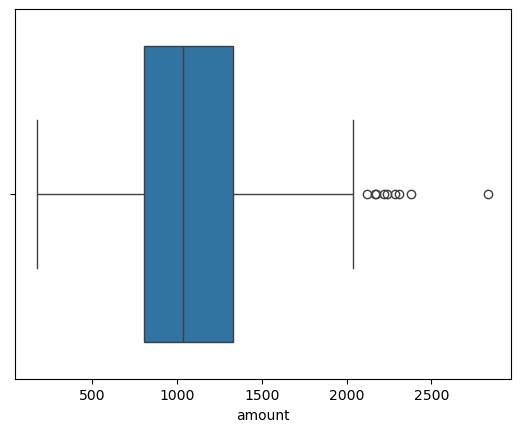

In [174]:
sns.boxplot(total_trans_client, orient='h')

As we already anticipated by reading the statistics, we find a slightly right skewed distribution (histogram), with some relevant high values in the right tail of the chart. We can double check this tendency by watching the boxplot, that shows the outliers out of the box, which is itself quite normally distributed. So let's focus on those high values, in order to see how many they are. In this case, we will catch the part of the tail of the histogram that gives this right skewed form. Doing it this way, we have on one hand our perfectly gaussian distribution and we study this tail separately, in order to see its characteristics: 

In [211]:
#first we target the values of our sample that are over 2000:
outliers_mask = clean_transactions.groupby('customer_id')['amount'].sum() >= 2000

#and then we use the max to filter within the total transactions object to have a separate varaible to study, and also to see how many transactions we have:
big_transactions = total_trans_client[outliers_mask]
big_transactions.count()


np.int64(12)

In [ ]:
#First, I want to see the percentage that the count of this big transactions represents in front of the total: 
(big_transactions.count() / total_trans_client.count() ) * 100 #out: 1.2

#now, let's see regarding the representation comparing to the total amount:
(big_transactions.sum() / total_trans_client.sum()) * 100


np.float64(2.4759501132259625)

The amount of big transactions represents the 1.2% of the total transactions, which is a very small part. However, it represents the 2.4% of the incomes. In order to have a 360 degrees point of view of this transactions, let's have some visualizations of them and let's find out the type of customer that is doing them: 

In [264]:
#let's see who is doing the big transactions:
top_clients = big_transactions.index
top_clients_df = customers_df[customers_df['customer_id' ].isin(top_clients)]

#here we have an overview of this small group
top_clients_df



,customer_id,age,income,region,account_type
220,1221,79,50310,Zurich,Gold
254,1255,22,110691,Lausanne,Premium
270,1271,66,107282,Geneva,Gold
292,1293,36,79848,Lausanne,Gold
386,1387,50,112543,Bern,Basic
395,1396,37,84617,Zurich,Gold
463,1464,48,58736,Zurich,Basic
502,1503,24,59545,Zurich,Basic
559,1560,38,73221,Lausanne,Basic
611,1612,44,40920,Basel,Premium


In [281]:
#here we have an overview of the statistics of this small group:
top_clients_df.describe()



,customer_id,age,income
count,12.000000,12.000000,12.000000
mean,1453.083333,44.250000,76378.916667
std,186.056911,16.944428,24331.262690
min,1221.000000,22.000000,40920.000000
25%,1287.500000,34.500000,58082.250000
50%,1430.000000,41.000000,76534.500000
75%,1573.000000,51.750000,90283.250000
max,1838.000000,79.000000,112543.000000


Regarding the statistics, we see a big gap between the minimum and maximum incomes, as the minimum income is 40920.- (which is a low income in Switzerland). This customer is also one of the very few that has a Premium account in this group (there is just another one). On the other hand, there is a maximum income of 112542.-, and this customer have paradoxly a Basic account, so we can say that there is not correlation between the incomes, the amount of the transaction and the account type. Finally, I would like to mention that the top region in this group is Zurich, and the top account type is basic.

## 2.2.- Transactions frequency by account type
In this subchapter, I will study the frequency of the transactions based on the account type. To do that, I can reuse the variable I created to group by account type

In [302]:
grouped_atype['date'].count()

account_type
Basic      5005
Gold       1911
Premium    3084
Name: date, dtype: int64

In [299]:
grouped_atype['amount'].mean()

account_type
Basic      108.936943
Gold       106.485207
Premium    107.811738
Name: amount, dtype: float64

As we can see, there is no major difference in the average transaction amount between the account types. However, the Basic customers make more transactinos, which suggests that the behavior in Basic customers is equally important, but relevantly more frequent. Below we can observe more clearly this behavior:

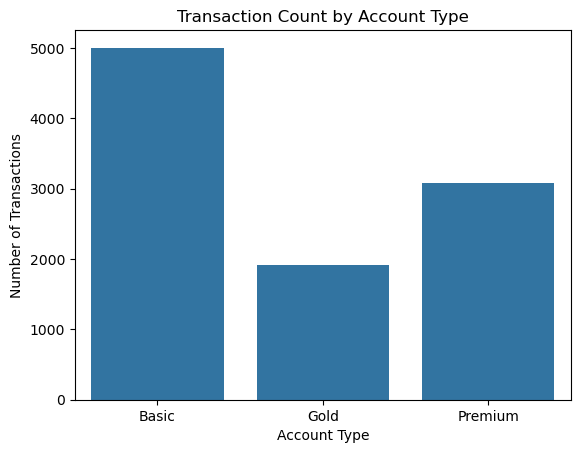

In [315]:
sns.barplot(grouped_atype['date'].count())
plt.title("Transaction Count by Account Type")
plt.ylabel("Number of Transactions")
plt.xlabel("Account Type")
plt.show()

### 2.3.- Monthly Spending Volume Analysis
In this last subchapter, I will study the monthly spending volume. To do that, I first need to group by date and then go to the amount colum in order to get the correct data:
 

In [334]:
#first I check that the date colum is in the proper format:
clean_transactions['date'] = pd.to_datetime(clean_transactions['date']) 

#then I create a colum with the month according to the transactions' date:
clean_transactions['month'] = clean_transactions['date'].dt.to_period('M')

#finally, I can get the monthly spending by grouping by month and going to the amount colum:
monthly_spending = clean_transactions.groupby('month')['amount'].sum().sort_index()

#I first study the statistics in order to have a first approach:
clean_transactions.groupby('month')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
2024-01,581.0,109.502788,42.075461,4.07,78.5800,107.960,138.3000,218.56
2024-02,528.0,108.667822,42.268565,0.78,78.1725,105.780,137.9075,249.77
2024-03,555.0,108.464216,39.434335,2.94,78.9300,107.170,135.1750,212.36
2024-04,548.0,109.488686,39.249935,2.73,79.2425,107.000,136.5850,221.25
2024-05,536.0,109.532593,40.581547,10.36,80.6250,106.355,137.3600,245.68
2024-06,552.0,108.564438,41.728584,12.30,77.5175,109.230,135.4725,235.84
2024-07,531.0,109.597740,40.033517,4.58,80.7850,108.750,137.7900,212.65
2024-08,573.0,106.419895,40.586533,0.17,78.6900,104.950,131.9000,218.16
2024-09,553.0,109.102948,40.715498,1.03,78.2800,108.470,134.5500,235.53


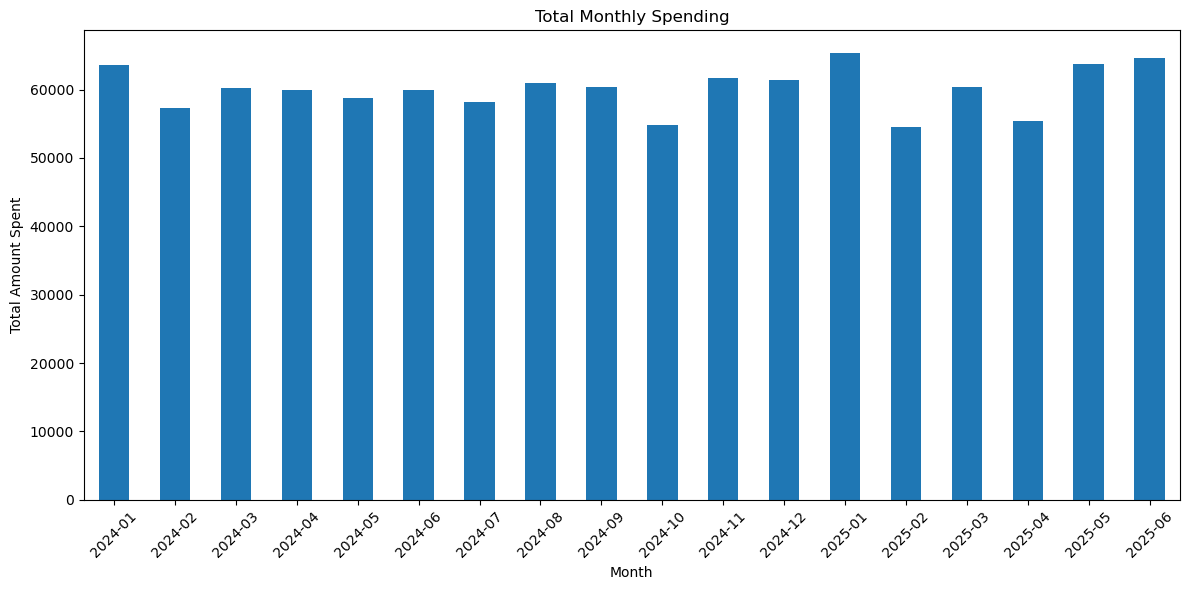

In [328]:
#I can then plot the data in order to visualize and study the behavior:

monthly_spending.plot(kind='bar', figsize=(12,6))
plt.title('Total Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on both the descriptive statistics and the plotted bar chart, monthly spending appears relatively stable across the observed period. There are no strong seasonal trends or significant variations, suggesting a consistent spending behavior over time. However, we observe slightly higher spending levels in January 2024 and January 2025, which could be attributed to post-holiday consumer behavior. This insight could be explored further for potential seasonal marketing strategies.

## Exporting the data for dashboarding

In [345]:
#clean transactions dataframe: 
clean_transactions.to_csv('C:/Users/aleja/OneDrive/Desktop/Workspaces/portfolio/simulated_bank/data/clean_transactions.csv')


In [344]:
#now, I need a segmentation of the clients, by income: 
min_income = customers_df.income.min()
q1 = customers_df.income.quantile(.25)
q2 = customers_df.income.quantile(.5)
q3 = customers_df.income.quantile(.75)
max_income = customers_df.income.max()

income_bins = [min_income,q1,q2,q3,max_income]

customers_df['income_category'] = pd.cut(customers_df['income'], bins=income_bins,labels=['low income','middle income','upper income','top income'], include_lowest=True)

#then I can export the df as csv:
customers_df.to_csv('C:/Users/aleja/OneDrive/Desktop/Workspaces/portfolio/simulated_bank/data/customers_df.csv')

In [347]:
#finally, I export my merged df to csv:
merged_df.to_csv('C:/Users/aleja/OneDrive/Desktop/Workspaces/portfolio/simulated_bank/data/merged_df.csv')